In [13]:
# Import the required libraries
from bs4 import BeautifulSoup 

import urllib.request
import pandas as pd
import matplotlib.pyplot as plt  #For data visualisation
import seaborn as sns

import time # Importing time module to measure the time taken for crawling websites
from collections import Counter # For finding the frequency of words
import pprint as pp   # For  printing dictionary

import warnings # The below package to ignore the warnings in the notebook
warnings.filterwarnings('ignore')



In [2]:
url = "http://quotes.toscrape.com/"

In [3]:
# Lambda function 
get_tag = lambda a : a.get_text() 
    

In [9]:
def crawl_module(html_page):
    """
    This function will crawl the web page and stores the information
    
    :param page : page obeject as the input parameter
    returns : A dataframe is returned which contains the information for the corresponding webpage
    """
    Quotes = []
    Author = []
    Tags   = []
    
    soup = BeautifulSoup(html_page, "html.parser")
    results = soup.find_all(class_='quote')
    for i in results:
        quote = i.find(class_='text').get_text()
        author = i.find(class_='author').get_text()
        tag = i.find_all(class_='tag')
        tag = list(map(get_tag,tag))
        tag = ','.join(tag)  #converting to string
        #print(tag)
        Quotes.append(quote)
        Author.append(author)
        Tags.append(tag)
        
        
    #converting into DataFrame    
    dt = pd.DataFrame(list(zip(Quotes,Author,Tags)), columns =['Quote', 'Author', 'Tags'])
    #print(dt)
    return dt
    

In [19]:
def check_module(url):
    """
    This functions checks the response codes of the page and the presence of quotes
    
    :param url : Url is taken as an input for which crawling has to be done
    return : A dataframe is returned where all the data from the webpages is crawled
    """
    
    data = pd.DataFrame() #Define a empty DataFrame which is used to store all the ouputs page outputs

    flag = True # Boolean value which is used to control the while loop
    page_number = 1
    # Iterating till we get empty content from the webpage
    while flag:
        
        url = "http://quotes.toscrape.com/" + "page/" + str(page_number) + "/"
        #print(url)
        response = urllib.request.urlopen(url)
        html = response.read()
        temp = crawl_module(html)

        if((str(response.getcode()) == '200') and (temp.empty==False)):

            data = data.append(temp, ignore_index=True)
            page_number = page_number + 1

        else:

            flag = False
            break
            
    return data,page_number


    

In [22]:
start = time.process_time()
data,total_pages = check_module(url)

print("Time taken to crawl website is :",time.process_time() - start,"seconds")


Time taken to crawl website is : 0.33291700000000013 seconds


In [18]:
data

,Quote,Author,Tags
0,“The world as we have created it is a process ...,Albert Einstein,"change,deep-thoughts,thinking,world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities,choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational,life,live,miracle,miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy,books,classic,humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself,inspirational"
...,...,...,...
95,“You never really understand a person until yo...,Harper Lee,better-life-empathy
96,“You have to write the book that wants to be w...,Madeleine L'Engle,"books,children,difficult,grown-ups,write,write..."
97,“Never tell the truth to people who are not wo...,Mark Twain,truth
98,"“A person's a person, no matter how small.”",Dr. Seuss,inspirational


# TASK 2

In [23]:
print("Total number of valid pages in the website we crawled is :",total_pages-1)

Total number of valid pages in the website we crawled is : 10


In [29]:
freq = data['Author'].value_counts()
freq

Albert Einstein           10
J.K. Rowling               9
Marilyn Monroe             7
Dr. Seuss                  6
Mark Twain                 6
C.S. Lewis                 5
Jane Austen                5
Bob Marley                 3
Eleanor Roosevelt          2
Charles Bukowski           2
Suzanne Collins            2
George R.R. Martin         2
Ralph Waldo Emerson        2
Mother Teresa              2
Ernest Hemingway           2
J.D. Salinger              1
George Bernard Shaw        1
J.R.R. Tolkien             1
Alfred Tennyson            1
Terry Pratchett            1
John Lennon                1
George Carlin              1
W.C. Fields                1
Ayn Rand                   1
Jimi Hendrix               1
J.M. Barrie                1
E.E. Cummings              1
Khaled Hosseini            1
Harper Lee                 1
Helen Keller               1
Haruki Murakami            1
Stephenie Meyer            1
Garrison Keillor           1
Thomas A. Edison           1
Douglas Adams 

[]

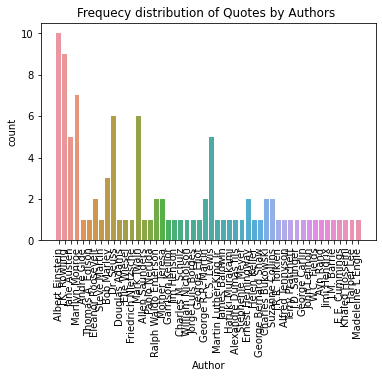

In [190]:
ax = sns.countplot(x = 'Author', data = data)

ax.tick_params(axis='x', rotation=90)
plt.title("Frequecy distribution of Quotes by Authors ")
plt.plot()

In [191]:
#Storing all the tags into one single dataframe

all_tags = []
temp = data['Tags'].map(lambda x: x.split(','))
for i in temp.values:
    all_tags = all_tags + i
    


In [192]:

tag_count = Counter(all_tags)
print("Frequency of tags are")
pp.pprint(tag_count)

Frequency of tags are
Counter({'love': 14,
         'inspirational': 13,
         'life': 13,
         'humor': 12,
         'books': 11,
         'reading': 7,
         'friendship': 5,
         'friends': 4,
         'truth': 4,
         'simile': 3,
         'attributed-no-source': 3,
         '': 3,
         'death': 3,
         'writing': 3,
         'thinking': 2,
         'classic': 2,
         'paraphrased': 2,
         'courage': 2,
         'philosophy': 2,
         'religion': 2,
         'yourself': 2,
         'children': 2,
         'music': 2,
         'learning': 2,
         'dumbledore': 2,
         'library': 2,
         'hope': 2,
         'change': 1,
         'deep-thoughts': 1,
         'world': 1,
         'abilities': 1,
         'choices': 1,
         'live': 1,
         'miracle': 1,
         'miracles': 1,
         'aliteracy': 1,
         'be-yourself': 1,
         'adulthood': 1,
         'success': 1,
         'value': 1,
         'edison': 1,
         'fa

[]

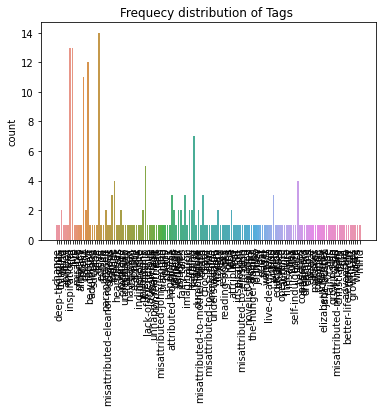

In [194]:
ax = sns.countplot(all_tags)
ax.tick_params(axis='x', rotation=90)
plt.title("Frequecy distribution of Tags ")
plt.plot()


In [160]:
Author_name = []
agg_words = []


for author_data in data.groupby('Author'):
    Author_name.append(author_data[0])
    agg_words.append(author_data[1]['Quote'].map(lambda x: len(x.split(' '))).mean())
    

[]

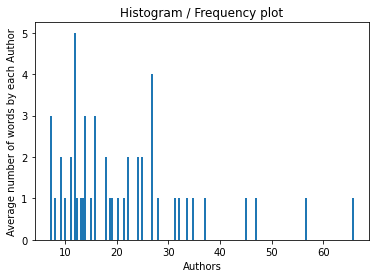

In [188]:
plt.hist(agg_words,bins=150)
plt.ylabel('Average number of words by each Author')
plt.xlabel('Authors')
plt.title("Histogram / Frequency plot")
plt.plot()

Text(0.5, 1.0, 'Line plot')

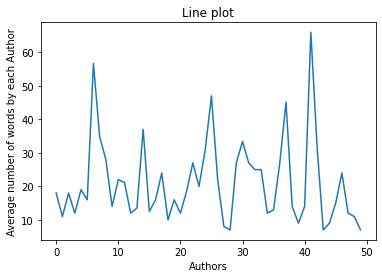

In [185]:
plt.plot(agg_words)
plt.ylabel('Average number of words by each Author')
plt.xlabel('Authors')
plt.title("Line plot")